### **`Predictive analysis of the sale price of apartments in São Paulo`**

This dataset has information on more than 1300 apartments avilable for sale or rent in the city of São Paulo, Brazil. The data was collected during april 2019 through webscrapping of real state classified sites.


**Source:** https://www.kaggle.com/datasets/argonalyst/sao-paulo-real-estate-sale-rent-april-2019?resource=download



**Properties (Un.): Description**

- Price (R$): Final price announced
- Condo (R$): Condominium fee (zero indicates that the value is unknown)
- Size (m²): Apartment size (only private areas)
- Rooms :Number od bedrooms
- Toilets: Number of bathrooms (all bathrooms)
- Suites: Number of bedrooms with private bathrooms
- Parking: Number of parking spaces
- Elevator: Binary value: 1 if there's elevator in the building, 0 otherwise
- Furnished: Binary value: 1 if the apartment is furnished, 0 otherwise
- Swimming Pool: Binary value: 1 if the apartment has a swimming pool, 0 otherwise
- New: Binary value: 1 if the apartment is new, 0 otherwise
- District: Location name
- Negotiation Type: Description of the type of negotiation: rent or sell
- Property Type: Property type (all observations are apartments) 
- Latitude: Latitude
- Longitude: Longitute


### **Main goal**

- Obtain a predictive model for apartment purchase prices in the city of São Paulo.
- obtain insights by exploring the relationships between features abd target.
 

## Importing and exploring the data
---

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import seaborn as sns

# Silencia os avisos de cópia 
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("sao-paulo-properties-april-2019.csv")

In [3]:
df.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665


In [4]:
df.shape

(13640, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [6]:
print(f'Total dataset observations: {len(df)}')
print(f'Missing values: {df.isnull().sum().sum()}')
print(f'Duplicate observations: {df.duplicated().sum()}')

Total dataset observations: 13640
Missing values: 0
Duplicate observations: 319


In [7]:
df.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District',
       'Negotiation Type', 'Property Type', 'Latitude', 'Longitude'],
      dtype='object')

In [8]:
for i in df.columns:
    print(i, '-', len(df[i].unique()), '-', df[i].dtypes)

Price - 1881 - int64
Condo - 1415 - int64
Size - 339 - int64
Rooms - 8 - int64
Toilets - 8 - int64
Suites - 7 - int64
Parking - 10 - int64
Elevator - 2 - int64
Furnished - 2 - int64
Swimming Pool - 2 - int64
New - 2 - int64
District - 96 - object
Negotiation Type - 2 - object
Property Type - 1 - object
Latitude - 8405 - float64
Longitude - 8451 - float64


In [9]:
df.dtypes.value_counts()

int64      11
object      3
float64     2
dtype: int64

In [10]:
df['Property Type'].unique()

array(['apartment'], dtype=object)

In [11]:
# Exploring the feature "Condo" (Condominium fee)
# Zero indicates that the condominium fee is unknown
print(f"Total observations: {len(df)}")
print(f"Number of unknown condominium fee: {(df['Condo'] == 0).value_counts()[True]}")
print(f"Number of known condominium fee: {(df['Condo'] == 0).value_counts()[False]}")
print(f"Percentage of unknown condominium fee: {(df['Condo'] == 0).value_counts(True)[True]*100:.2f}%")


Total observations: 13640
Number of unknown condominium fee: 1977
Number of known condominium fee: 11663
Percentage of unknown condominium fee: 14.49%


In [12]:
df['Negotiation Type'].unique()

array(['rent', 'sale'], dtype=object)

## Data cleaning
___

In [13]:
df.shape

(13640, 16)

In [14]:
# Total observations
print(f"Total duplicate observations: {df.duplicated().sum()}")

# Removing duplicate values
df2 = df.drop_duplicates()

Total duplicate observations: 319


In [15]:
# Removing column "Property Type"
# Regarding to "Property Type", all observations are apartments
df2 = df2.drop('Property Type', axis=1)
df2.shape

(13321, 15)

In [16]:
# Treatment of categorical variables

# Pre processing of variables
# This step is performed so that the variables one-hot-encoded work on split data
df2["District"] = pd.Categorical(df2["District"])

# One hot encoding of categorical variables string 'District' 
df2 = pd.get_dummies(df2, columns=['District'])

In [17]:
df2.shape

(13321, 110)

In [18]:
# Setting to display all dataframe columns
pd.set_option("display.max_columns", None)

In [19]:
df2.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Negotiation Type,Latitude,Longitude,District_Alto de Pinheiros/São Paulo,District_Anhanguera/São Paulo,District_Aricanduva/São Paulo,District_Artur Alvim/São Paulo,District_Barra Funda/São Paulo,District_Bela Vista/São Paulo,District_Belém/São Paulo,District_Bom Retiro/São Paulo,District_Brasilândia/São Paulo,District_Brooklin/São Paulo,District_Brás/São Paulo,District_Butantã/São Paulo,District_Cachoeirinha/São Paulo,District_Cambuci/São Paulo,District_Campo Belo/São Paulo,District_Campo Grande/São Paulo,District_Campo Limpo/São Paulo,District_Cangaíba/São Paulo,District_Capão Redondo/São Paulo,District_Carrão/São Paulo,District_Casa Verde/São Paulo,District_Cidade Ademar/São Paulo,District_Cidade Dutra/São Paulo,District_Cidade Líder/São Paulo,District_Cidade Tiradentes/São Paulo,District_Consolação/São Paulo,District_Cursino/São Paulo,District_Ermelino Matarazzo/São Paulo,District_Freguesia do Ó/São Paulo,District_Grajaú/São Paulo,District_Guaianazes/São Paulo,District_Iguatemi/São Paulo,District_Ipiranga/São Paulo,District_Itaim Bibi/São Paulo,District_Itaim Paulista/São Paulo,District_Itaquera/São Paulo,District_Jabaquara/São Paulo,District_Jaguaré/São Paulo,District_Jaraguá/São Paulo,District_Jardim Helena/São Paulo,District_Jardim Paulista/São Paulo,District_Jardim São Luis/São Paulo,District_Jardim Ângela/São Paulo,District_Jaçanã/São Paulo,District_José Bonifácio/São Paulo,District_Lajeado/São Paulo,District_Lapa/São Paulo,District_Liberdade/São Paulo,District_Limão/São Paulo,District_Mandaqui/São Paulo,District_Medeiros/São Paulo,District_Moema/São Paulo,District_Mooca/São Paulo,District_Morumbi/São Paulo,District_Pari/São Paulo,District_Parque do Carmo/São Paulo,District_Pedreira/São Paulo,District_Penha/São Paulo,District_Perdizes/São Paulo,District_Perus/São Paulo,District_Pinheiros/São Paulo,District_Pirituba/São Paulo,District_Ponte Rasa/São Paulo,District_Raposo Tavares/São Paulo,District_República/São Paulo,District_Rio Pequeno/São Paulo,District_Sacomã/São Paulo,District_Santa Cecília/São Paulo,District_Santana/São Paulo,District_Santo Amaro/São Paulo,District_Sapopemba/São Paulo,District_Saúde/São Paulo,District_Socorro/São Paulo,District_São Domingos/São Paulo,District_São Lucas/São Paulo,District_São Mateus/São Paulo,District_São Miguel/São Paulo,District_São Rafael/São Paulo,District_Sé/São Paulo,District_Tatuapé/São Paulo,District_Tremembé/São Paulo,District_Tucuruvi/São Paulo,District_Vila Andrade/São Paulo,District_Vila Curuçá/São Paulo,District_Vila Formosa/São Paulo,District_Vila Guilherme/São Paulo,District_Vila Jacuí/São Paulo,District_Vila Leopoldina/São Paulo,District_Vila Madalena/São Paulo,District_Vila Maria/São Paulo,District_Vila Mariana/São Paulo,District_Vila Matilde/São Paulo,District_Vila Olimpia/São Paulo,District_Vila Prudente/São Paulo,District_Vila Sônia/São Paulo,District_Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,0,rent,-23.543138,-46.479486,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1000,148,45,2,2,1,1,0,0,0,0,rent,-23.550239,-46.480718,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1000,100,48,2,2,1,1,0,0,0,0,rent,-23.542818,-46.485665,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Reset pandas display default setting
pd.reset_option("all")

In [21]:
# Removing the variables Latitude and Longitude
df2 = df2.drop(["Latitude", "Longitude"], axis=1)

In [22]:
# Checking columns that have float
mask = df2.dtypes == np.float
print(f"Columns containing float values: {len(df2.columns[mask])}")

Columns containing float values: 0


The dataset has information regarding apartments for rent and sale. Therefore, a filter will be used to extract the observations regarding the sale.

Once the variable referring to the type of negotiation (rent or sale) was filtered, this property becomes dispensable, since all the observations of the subset obtained refer to the same type of negotiation.

In [23]:
df2['Negotiation Type'].unique()

array(['rent', 'sale'], dtype=object)

In [24]:
# Filtering the observations referring to the sale 
mask = df2['Negotiation Type'] == "sale"
df_sale = df2[mask]

# Removing variable 'Negotiation Type' (now they all refer to sale) 
df_sale = df_sale.drop('Negotiation Type', axis=1)

# Checking the subset shape
df_sale.shape

(6302, 107)

Features and target obtained: 

In [25]:
district = []

for name in df2.columns:
    if "District" in name:
        district.append(name)

In [26]:
mask_y = ['Price']


mask_metric_cols = ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking']


mask_categorical_cols = ['Elevator', 'Furnished', 'Swimming Pool', 'New']

mask_categorical_dummies_cols = district

## Spliting train and test set
---


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Separating the training and test sets

# Separating the dataset with one hot encoded features (dummies)
X_sale = df_sale.drop('Price', axis=1)
y_sale = df_sale.Price

X_sale_train, X_sale_test, y_sale_train, y_sale_test = train_test_split(X_sale, y_sale, test_size=0.3, random_state=42)

In [29]:
# Separating the dataset with features that are not one hot encoded (dummies)
X_sale_not_ohc = df_sale.drop(['Price'] + district, axis=1)
y_sale_not_ohc = df_sale.Price

X_sale_train_not_ohc, X_sale_test_not_ohc, y_sale_train_not_ohc, y_sale_test_not_ohc = train_test_split(X_sale_not_ohc, y_sale_not_ohc, test_size=0.3, random_state=42)

In [30]:
# Comparing subset indices to ensure they are identical since the same random_state was used
(X_sale_train_not_ohc.index == X_sale_train.index).all()

True

## Transforming target
___

With a normally distributed target variable, better results are usually obtained.

First, the distribution of the target variable was verified. And then, if it did not have a normal distribution, a transformation method was applied, such as log, square root or box cox.

In [31]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

# Applying the D'Agostino K² statistical test to verify the distribution of the target variable
p_original_sale = normaltest(df_sale.Price.values)
p_original_sale

NormaltestResult(statistic=6419.569293214452, pvalue=0.0)

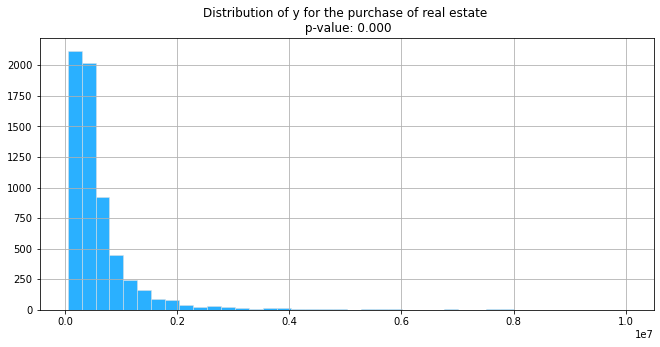

In [32]:
# Visually checking if the target variable is well distributed
n_bins = 20
plt.figure(figsize=(11,5))

df_sale.Price.hist(bins=40, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5)

plt.title(f"Distribution of y for the purchase of real estate \n p-value: {p_original_sale[1]:.3f}", 
          fontsize=12)

plt.show()

It is possible to observe, both visually and according to the D'Agostino K² statistical test, that the variable y does not have a normal distribution. The proposition p > 0.05 is false.

To apply the most appropriate transformation, the target variable transformation method was screened.

In [33]:
from scipy.stats import boxcox

In [34]:
# Applying Log, Square root or Box cox transformations

log_y = np.log(df_sale.Price) # Log tranformation

sqrt_y = np.sqrt(df_sale.Price) # Square root transformation

# Boxcox transformation
bc_y = boxcox(df_sale.Price)
boxcox_y = bc_y[0]
lam = bc_y[1]

In [35]:
# Applying the D'Agostino K² statistical test to verify the distribution of the target variable

p_log = normaltest(log_y)
p_sqrt = normaltest(sqrt_y)
p_boxcox = normaltest(boxcox_y)

In [36]:
# Function to set the histogram color formatting
def color_format(n, patches):
    n = n.astype('int') # Must be integer
    # Loop to assign the color according to the colormap
    for i in range(len(patches)):
        patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

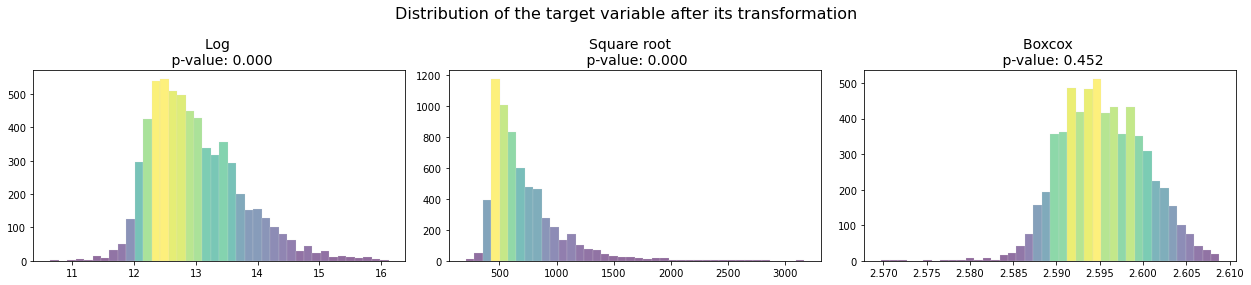

In [37]:
# Plotting the target distribution after each transformation
# As well as the results of the respective statistical tests

fig, axs = plt.subplots(1,3,
                        figsize = (17.5,4),
                        tight_layout = True)


n, bins, patches = axs[0].hist(log_y, bins=40, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.3, alpha=0.6)
color_format(n, patches) # Função que formata o estilo do gáfico
n, bins, patches = axs[1].hist(sqrt_y, bins=40, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.3, alpha=0.6)
color_format(n, patches)
n, bins, patches = axs[2].hist(boxcox_y, bins=40, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.3, alpha=0.6)
color_format(n, patches)


# Inserting titles
axs[0].set_title(f"Log \n p-value: {p_log[1]:.3f}", fontsize=14)
axs[1].set_title(f"Square root  \n p-value: {p_sqrt[1]:.3f}", fontsize=14)
axs[2].set_title(f"Boxcox \n p-value: {p_boxcox[1]:.3f}", fontsize=14)

fig.suptitle('Distribution of the target variable after its transformation', fontsize=16)
plt.style.use('bmh')

plt.show()

Through the Boxcox transformation, it was possible to obtain a target variable with normal distribution (p > 0.05).

## Linear Regression Model
___

Three Linear Regression models were performed: Simple Linear Regression, Linear Regression with Rigde regularization (L2) and Linear Regression with Lasso regularization (L1).

In each case, the features were scaled using the MinMax procedure. The polynomial creation of features and the transformation of the target were also performed using BoxCox normalization.

The model pipeline and GridSearch were used to experiment and select the hyperparameters.


The prediction of each model with and without the categorical descriptive variables pre-processed by one-hot-encoding was analyzed.


In [38]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from scipy.special import inv_boxcox


from sklearn.model_selection import GridSearchCV

In [39]:
# Boxcox transformation
y_boxcox = boxcox(y_sale_train)
y_sale_train_bc = y_boxcox[0]
lam = y_boxcox[1]

In [40]:
# The KFold object tells the cross validation object how to split up the data

kf = KFold(shuffle=True, random_state=72018, n_splits=5) # Data is split into five folds

### **1. Linear regression**


In [41]:
estimator = Pipeline([("scaler", MinMaxScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", LinearRegression())])

params = {
    'polynomial_features__degree': [1, 2],
}

linear_regression = GridSearchCV(estimator, params, cv=kf)

Training the linear regression model without the processing of the target transformation through the Boxcox transformation.

In [42]:
# Training the linear regression model
linear_regression_bc = linear_regression.fit(X_sale_train, y_sale_train_bc);
linear_regression_bc.best_score_, linear_regression_bc.best_params_

(0.84707115008011, {'polynomial_features__degree': 1})

In [43]:
# Estimating the model error with respect to the train set 

y_predict_lr = linear_regression_bc.predict(X_sale_train)
# y_predict_bc = inv_boxcox(y_predict,lam)
# r2_score(y_sale_train,y_predict_bc)

lr_train_score_bc = r2_score(y_sale_train_bc,y_predict_lr)
lr_train_score_bc

0.8551850018955516

In [44]:
# Estimating model error in the test set
z=boxcox(y_sale_test,lam)

y_predict_test_lr = linear_regression_bc.predict(X_sale_test)
# y_predict_bc = inv_boxcox(y_predict_test,lam)
# ridge_test_score = r2_score(y_sale_test,y_predict_bc)
lr_test_score_bc = r2_score(z, y_predict_test_lr)
lr_test_score_bc

0.8507878551370501

Training the linear regression model without the target transformation procedure.

In [45]:
# Training the linear regression model without the target transformation procedure

lr_grid_fit = linear_regression.fit(X_sale_train, y_sale_train);
lr_grid_fit.best_score_, lr_grid_fit.best_params_

(0.7957867279520098, {'polynomial_features__degree': 1})

In [46]:
# Estimating the model error with respect to the train set 

y_predict = lr_grid_fit.predict(X_sale_train)
lr_train_score = r2_score(y_sale_train,y_predict)
lr_train_score

0.8127320804162446

In [47]:
# Estimating the model error with respect to the test set 

y_predict_test = lr_grid_fit.predict(X_sale_test)
lr_test_score = r2_score(y_sale_test,y_predict_test)
lr_test_score

0.7990367637707928

### **2. Ridge regression**

In [48]:
# Same estimator as before
# Pipeline using Ridge 
estimator = Pipeline([("scaler", MinMaxScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2],
    'ridge_regression__alpha': np.geomspace(1e-9, 1, 30)
}

ridge_grid = GridSearchCV(estimator, params, cv=kf)

Training the linear regression model considering the Boxcox target transformation.

In [49]:
# Training the linear regression model

ridge_grid_bc = ridge_grid.fit(X_sale_train, y_sale_train_bc);
ridge_grid_bc.best_score_, ridge_grid_bc.best_params_

(0.8745734216460678,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 0.4893900918477499})

In [50]:
# Estimating the model error with respect to the train set 

y_predict = ridge_grid_bc.predict(X_sale_train)
# y_predict_bc = inv_boxcox(y_predict,lam)
# r2_score(y_sale_train,y_predict_bc)

ridge_train_score_bc = r2_score(y_sale_train_bc,y_predict)
ridge_train_score_bc

0.9114971267188228

In [51]:
# Estimating the model error with respect to the test set 
z=boxcox(y_sale_test,lam)

y_predict_test = ridge_grid_bc.predict(X_sale_test)
# y_predict_bc = inv_boxcox(y_predict_test,lam)
# ridge_test_score = r2_score(y_sale_test,y_predict_bc)
ridge_test_score_bc = r2_score(z, y_predict_test)
ridge_test_score_bc


0.8809099171080754

In [52]:
ridge_grid_bc_scores = pd.DataFrame(ridge_grid_bc.cv_results_['mean_test_score'], columns=['scores'])
ridge_grid_bc_alphas = pd.DataFrame(ridge_grid_bc.cv_results_['params'])
ridge_grid_bc_results = ridge_grid_bc_alphas.join(ridge_grid_bc_scores)

mask = ridge_grid_bc_results['polynomial_features__degree']==ridge_grid_bc.best_params_['polynomial_features__degree']
ridge_grid_bc_results = ridge_grid_bc_results[mask]

x = ridge_grid_bc_results['ridge_regression__alpha']
y = ridge_grid_bc_results['scores']

R²: 0.8746

Best parameters:
Polynomial degree: 2
Alpha: 0.4894


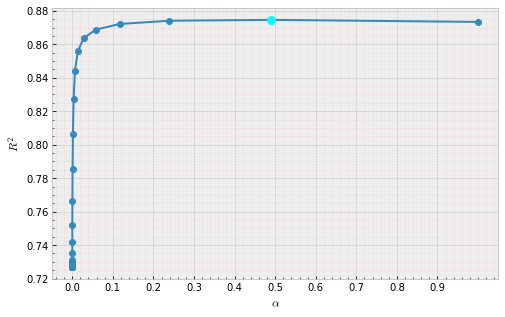

In [53]:
print(f'R²: {ridge_grid_bc.best_score_:.4f}\n')
print("Best parameters:")
print(f"Polynomial degree: {ridge_grid_bc.best_params_['polynomial_features__degree']}")
print(f"Alpha: {ridge_grid_bc.best_params_['ridge_regression__alpha']:.4f}")

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, '-o')

plt.plot(x.reset_index(drop=True)[y.reset_index(drop=True).argmax()]
        ,y.max()
        , color='cyan', marker='o', markersize=8)

plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

plt.xticks(np.arange(x.min(),x.max(),.1))
plt.grid(which='minor', color='r', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.show()

Training the linear regression model without the processing of the target transformation through the Boxcox transformation.

In [54]:
# Training the linear regression model without the target transformation procedure

ridge_grid_fit = ridge_grid.fit(X_sale_train, y_sale_train);
ridge_grid_fit.best_score_, ridge_grid_fit.best_params_

(0.8733275997991221,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 1.0})

In [55]:
# Estimating the model error with respect to the train set 

y_predict = ridge_grid_fit.predict(X_sale_train)
ridge_train_score = r2_score(y_sale_train,y_predict)
ridge_train_score

0.9301315450504009

In [56]:
# Estimating the model error with respect to the test set 

y_predict_test = ridge_grid_fit.predict(X_sale_test)
ridge_test_score = r2_score(y_sale_test,y_predict_test)
ridge_test_score

0.877547693676485

In [57]:
ridge_grid_scores = pd.DataFrame(ridge_grid_fit.cv_results_['mean_test_score'], columns=['scores'])
ridge_grid_alphas = pd.DataFrame(ridge_grid_fit.cv_results_['params'])
ridge_grid_results = ridge_grid_alphas.join(ridge_grid_scores)

mask = ridge_grid_results['polynomial_features__degree']==ridge_grid_fit.best_params_['polynomial_features__degree']
ridge_grid_results = ridge_grid_results[mask]

x = ridge_grid_results['ridge_regression__alpha']
y = ridge_grid_results['scores']

R²: 0.8733

Best parameters:
Polynomial degree: 2
Alpha: 1.0000


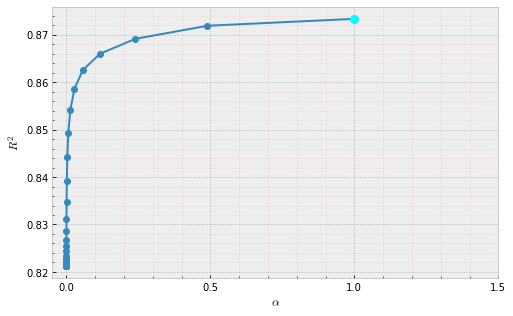

In [58]:
print(f'R²: {ridge_grid_fit.best_score_:.4f}\n')
print("Best parameters:")
print(f"Polynomial degree: {ridge_grid_fit.best_params_['polynomial_features__degree']}")
print(f"Alpha: {ridge_grid_fit.best_params_['ridge_regression__alpha']:.4f}")

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, '-o')

plt.plot(x.reset_index(drop=True)[y.reset_index(drop=True).argmax()]
        ,y.max()
        , color='cyan', marker='o', markersize=8)

plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

plt.xticks(np.arange(x.min(),x.max()+1,.5))
plt.grid(which='minor', color='r', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.show()

### **3. Lasso regression**

In [59]:
# Same estimator as before

estimator = Pipeline([("scaler", MinMaxScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2],
    'lasso_regression__alpha': np.geomspace(10e-9, 3, num=20)
}

lasso_grid = GridSearchCV(estimator, params, cv=kf)

Training the linear regression model considering the Boxcox target transformation.


In [60]:
# Training the linear regression model with target transformation

lasso_grid_bc = lasso_grid.fit(X_sale_train, y_sale_train_bc);
lasso_grid_bc.best_score_, lasso_grid_bc.best_params_

(0.8768741010280394,
 {'lasso_regression__alpha': 6.090558321815886e-07,
  'polynomial_features__degree': 2})

In [61]:
# Estimating the model error with respect to the train set 
y_predict_train = lasso_grid_bc.predict(X_sale_train)
# y_predict_bc = inv_boxcox(y_predict_train,lam)
# r2_score(y_sale_train,y_predict_bc)

lasso_train_score_bc = r2_score(y_sale_train_bc, y_predict_train)
lasso_train_score_bc 

0.9036226133636306

In [62]:
# Estimating the model error with respect to the test set 

z=boxcox(y_sale_test,lam)

y_predict_test = lasso_grid_bc.predict(X_sale_test)
#y_predict_bc = inv_boxcox(y_predict_test,lam)
#r2_score(y_sale_test, y_predict_bc)
lasso_test_score_bc = r2_score(z, y_predict_test)
lasso_test_score_bc


0.8838976319072057

In [63]:
lasso_grid_bc_scores = pd.DataFrame(lasso_grid_bc.cv_results_['mean_test_score'], columns=['scores'])
lasso_grid_bc_alphas = pd.DataFrame(lasso_grid_bc.cv_results_['params'])
lasso_grid_bc_results = lasso_grid_bc_alphas.join(lasso_grid_bc_scores)

mask = lasso_grid_bc_results['polynomial_features__degree']==lasso_grid_bc.best_params_['polynomial_features__degree']
lasso_grid_bc_results = lasso_grid_bc_results[mask]

# Serie of alpha values 
x = lasso_grid_bc_results['lasso_regression__alpha']

# Serie of scores
y = lasso_grid_bc_results['scores']

R²: 0.8769

Best parameters:
 - Polynomial degree: 2
 - Alpha: 6.090558321815886e-07


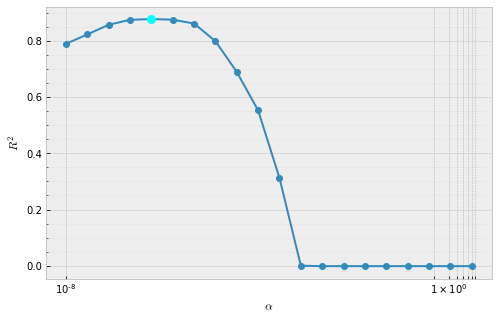

In [64]:
print(f'R²: {lasso_grid_bc.best_score_:.4f}\n')
print("Best parameters:")
print(f" - Polynomial degree: {lasso_grid_bc.best_params_['polynomial_features__degree']}")
print(f" - Alpha: {lasso_grid_bc.best_params_['lasso_regression__alpha']}")


# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, '-o')
plt.xscale('log')

plt.plot(x.reset_index(drop=True)[y.reset_index(drop=True).argmax()]
        ,y.max()
        , color='cyan', marker='o', markersize=8)

plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

plt.xticks(np.arange(x.min(),x.max()+1,.5))
plt.grid(which='minor', color='r', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.show()

Training the linear regression model without the target transformation procedure.

In [65]:
# Training the linear regression model without the target transformation procedure

lasso_grid_fit = lasso_grid.fit(X_sale_train, y_sale_train);
lasso_grid_fit.best_score_, lasso_grid_fit.best_params_

(0.8512558297328917,
 {'lasso_regression__alpha': 3.0, 'polynomial_features__degree': 2})

In [66]:
# Estimating the model error with respect to the train set 

y_predict_train = lasso_grid_fit.predict(X_sale_train)
lasso_train_score = r2_score(y_sale_train,y_predict_train) 
lasso_train_score

0.9533506887294195

In [67]:
# Estimating the model error with respect to the test set 

y_predict_test = lasso_grid.predict(X_sale_test)
lasso_test_score = r2_score(y_sale_test,y_predict_test)
lasso_test_score

0.8697696633198134

In [68]:
lasso_grid_scores = pd.DataFrame(lasso_grid_fit.cv_results_['mean_test_score'], columns=['scores'])
lasso_grid_alphas = pd.DataFrame(lasso_grid_fit.cv_results_['params'])
lasso_grid_results = lasso_grid_alphas.join(lasso_grid_scores)

mask = lasso_grid_results['polynomial_features__degree']==lasso_grid_fit.best_params_['polynomial_features__degree']
lasso_grid_results = lasso_grid_results[mask]

# Serie of alpha values 
x = lasso_grid_results['lasso_regression__alpha']

# Serie of scores
y = lasso_grid_results['scores']

R²: 0.8513

Best parameters:
 - Polynomial degree: 2
 - Alpha: 3.0000


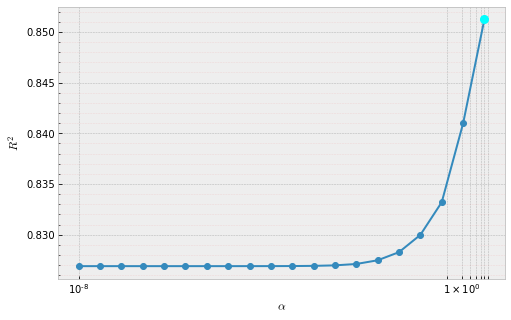

In [69]:
print(f'R²: {lasso_grid_fit.best_score_:.4f}\n')
print("Best parameters:")
print(f" - Polynomial degree: {lasso_grid_fit.best_params_['polynomial_features__degree']}")
print(f" - Alpha: {lasso_grid_fit.best_params_['lasso_regression__alpha']:.4f}")


# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, '-o')
plt.xscale('log')

plt.plot(x.reset_index(drop=True)[y.reset_index(drop=True).argmax()]
        ,y.max()
        , color='cyan', marker='o', markersize=8)

plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

plt.xticks(np.arange(x.min(),x.max()+1,.5))
plt.grid(which='minor', color='r', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.show()

## Comparing the methods
--- 

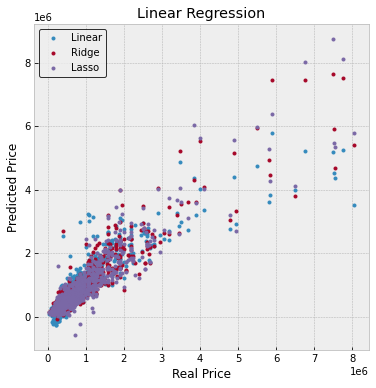

In [70]:
# y predito versus y real

fig = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Linear', 'Ridge', 'Lasso']

models = [linear_regression, ridge_grid, lasso_grid]

for mod, lab in zip(models, labels):
    ax.plot(y_sale_test, mod.predict(X_sale_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Real Price', 
       ylabel='Predicted Price', 
       title='Linear Regression');

In [71]:
#rmse_vals = [linear_score, ridge_test_score, lasso_test_score]
scores = [lr_test_score, ridge_test_score, lasso_test_score]
scores_bc = [lr_test_score_bc, ridge_test_score_bc, lasso_test_score_bc]

#labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']
labels = ['Linear', 'Ridge', 'Lasso']

scores_df = pd.Series(scores, index=labels).to_frame()
scores_df.rename(columns={0: 'Without target transformation'}, inplace=1)
scores_df['With Boxcox transformation'] = pd.Series(scores_bc, index=labels).to_frame()
scores_df.reset_index(0)

print("R² of each of the models in relation to the training set")
print(scores_df)

R² of each of the models in relation to the training set
        Without target transformation  With Boxcox transformation
Linear                       0.799037                    0.850788
Ridge                        0.877548                    0.880910
Lasso                        0.869770                    0.883898


All models present better results with the transformation of the target by BoxCox.

## Gradient descent
---

In [72]:
# The models that presented the best results were those
models = [linear_regression_bc, ridge_grid_bc, lasso_grid_bc]

In [73]:
from sklearn.metrics import mean_squared_error

# Mean squared error function
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [74]:
# Calculation of the error of already trained models
linearRegression_rmse = rmse(y_sale_test, linear_regression_bc.predict(X_sale_test))
ridgeCV_rmse = rmse(y_sale_test, ridge_grid_bc.predict(X_sale_test))
lassoCV_rmse = rmse(y_sale_test, lasso_grid_bc.predict(X_sale_test))


rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse]
labels = ['Linear', 'Ridge', 'Lasso']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)

In [75]:
scaler = MinMaxScaler()

# Preprocessing features by MinMax scaling
X_train_scaled = scaler.fit_transform(X_sale_train)
X_test_scaled = scaler.transform(X_sale_test)

In [76]:
from sklearn.preprocessing import PolynomialFeatures

# The models that presented the best results were those
models = [linear_regression_bc, ridge_grid_bc, lasso_grid_bc]
labels = ['Linear', 'Ridge', 'Lasso']

# Getting the best parameters of each model in relation to the polynomial degree
degrees=[model.best_params_['polynomial_features__degree'] for model in models]

degrees = dict(zip(labels,degrees))

In [77]:
# gradient descendent
from sklearn.linear_model import SGDRegressor


model_parameters_dict = {
    'Linear': {'penalty':'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lasso_grid_bc.best_params_['lasso_regression__alpha']},
    'Ridge': {'penalty': 'l1',
           'alpha': ridge_grid_bc.best_params_['ridge_regression__alpha']}
           #'Learning rate': 'Learning rate : 0.0025'}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    degree = degrees[modellabel]
    pf = PolynomialFeatures(degree=degree)
    X_train_pf= pf.fit_transform(X_train_scaled)
    X_test_pf = pf.transform(X_test_scaled)
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_pf, y_sale_train_bc)
    new_rmses[modellabel] = rmse(z, SGD.predict(X_test_pf)) # z is the y after the boxcox procedure, it was defined at the beginning of model training


rmse_df['RMSE-SGD'] = pd.Series(new_rmses, index=labels).to_frame()
rmse_df

,RMSE,RMSE-SGD
Linear,323556.570511,0.022642
Ridge,252566.298957,0.004845
Lasso,260464.174802,0.004531
